Aka. **Probability integral transformation (PIT) theorem**, Given $X$ is an r.v. with a continuous and strictly increasing CDF $F_X(x)$, and $Y = F_X(X)$, then $Y$ is uniformly distributed on $(0, 1)$.

**Proof**:

Let

\begin{align*}
y &= h(x) = F_X(x) = \mathbb{P}(X \le x) \\
x &= h^{-1}(y) \\
Y &= h(X) \\
\end{align*}

Note, $h(x)$ is just a simplified notation of the CDF $F_X(x)$.

Then we have

\begin{align*}
\mathbb{P}(Y \le y)
&= \mathbb{P}\left(h(X) \le h(x)\right) \\
&= \mathbb{P}(X \le x) \\
&= \mathbb{P}\left(X \le h^{-1}(y) \right) \\
&= h\left(h^{-1}(y)\right) \\
&= y
\end{align*}

Note, on the 2nd equality, we used the condition that $h(X)$ is strictly increasing. Note, this condition can be relaxed and the PIT theorem will still hold.

Therefore, $Y \sim \text{uniform(0, 1)}$.

**Application in sampling**.

To sample $x$ from $F_X(x)$, first sample $h(x)$ from a $\text{uniform}(0, 1)$, and then apply $h^{-1}$ to $h(x)$ so as to obtain $x$.

Ref: [Lecture 15: Midterm Review | Statistics 110](https://youtu.be/yFRZf81sB5k?t=9m26s)

Next, we will illustrate this method with a few common distributions, and compare our sample to the method implemented in numpy

In [1]:
import numpy as np
from scipy import misc, special, stats
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.style.use('classic')

%matplotlib inline

# [Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)

CDF:
$$h(x) = 1 - e^{-\frac{y}{\beta}}$$

inverse CDF:
$$h^{-1}(y) = -\beta \mathrm{log}(1 - y)$$

In [2]:
def cdf(x, scale=1):
    return 1 - np.exp(-x / scale)

In [3]:
def cdf_inv(y, scale=1):
    return -scale * np.log(1 - y)

First sample from uniform, these are values for CDF, so has to be between [0, 1]. We purposely put the histogram horizontal to make the point that we are sampling $h(x)$, the probability.

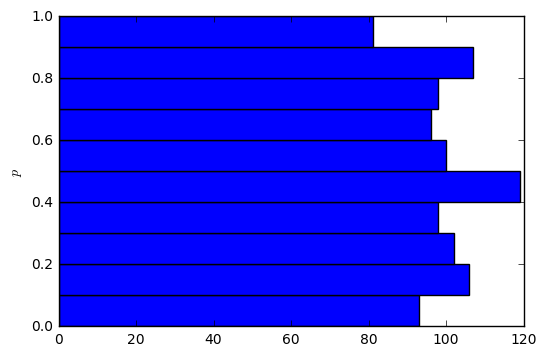

In [4]:
hs = np.random.uniform(0, 1, 1000)
_ = plt.hist(hs, orientation='horizontal')
plt.ylabel('$p$')

Apply $h^{-1}$

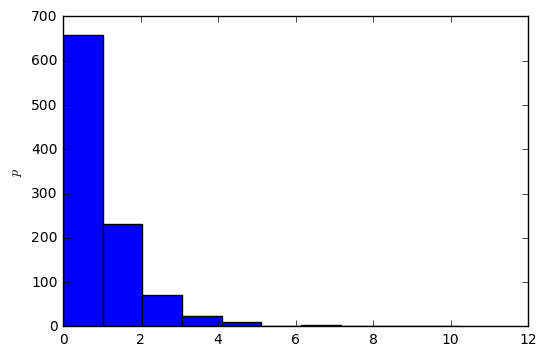

In [5]:
xs = cdf_inv(hs)
_ = plt.hist(xs)
plt.ylabel('$p$')

compare to numpy functions

In [6]:
xs_from_np = np.random.exponential(scale=1, size=1000)

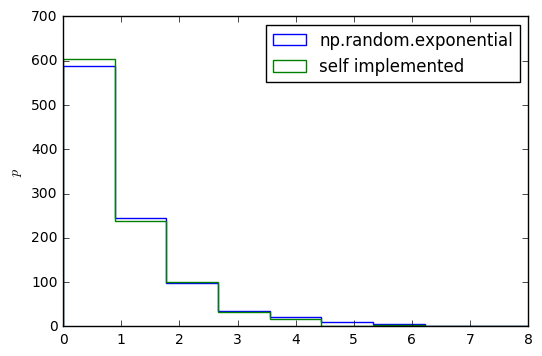

In [7]:
ax = plt.axes()

bins = np.linspace(0, 8, 10)
ax.hist(xs_from_np, bins=bins, histtype='step', label='np.random.exponential')
ax.hist(xs, bins=bins, histtype='step', label='self implemented')

ax.legend()
ax.set_ylabel('$p$')

Awesome! They match well.

Put $h(x)$ and $h^{-1}(x)$ in one picture. Sampling from a uniform distribution is represented on the y axis, then we apply the inverse function, and map the sampled data to the x axis, which is distributed following the exact distribution we want. 

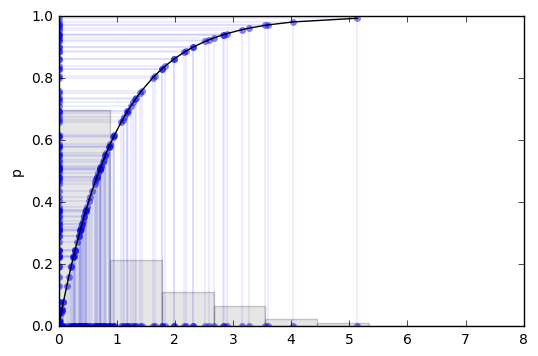

In [8]:
ax = plt.axes()

hs = np.sort(np.random.uniform(0, 1, 100))
for i in hs:
    ax.plot([0, cdf_inv(i), cdf_inv(i)], [i, i, 0], 'o-',
            color='blue', lw=0.2, markersize=5, alpha=0.5, markeredgecolor='none')
ax.plot(cdf_inv(hs), hs, color='black')
ax.set_ylabel('p')
_ = ax.hist(cdf_inv(hs), bins=bins, alpha=0.2, color='gray', normed=True)

# [Normal distribution](https://en.wikipedia.org/wiki/Exponential_distribution)

CDF:
$$h(x) = \frac{e^x}{1 + e^{x}}$$

inverse CDF:
$$h^{-1}(y) = \mathrm{\frac{y}{1 - y}}$$

In [9]:
def cdf(x, scale=1):
    return np.exp(x) / (1 + np.exp(x))

In [10]:
def cdf_inv(y, scale=1):
    return np.log(y / (1 - y))

First sample from uniform, these are values for CDF, so has to be between [0, 1]. We purposely put the histogram horizontal to make the point that we are sampling $h(x)$, the probability.

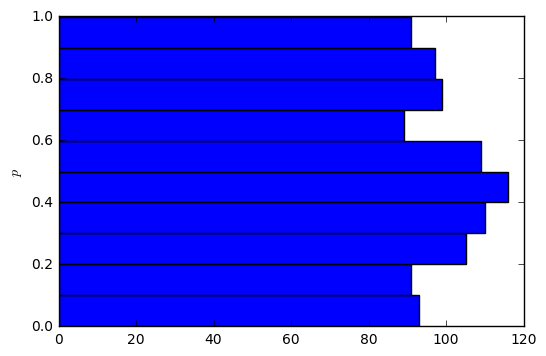

In [11]:
hs = np.random.uniform(0, 1, 1000)
_ = plt.hist(hs, orientation='horizontal')
plt.ylabel('$p$')

Apply $h^{-1}$

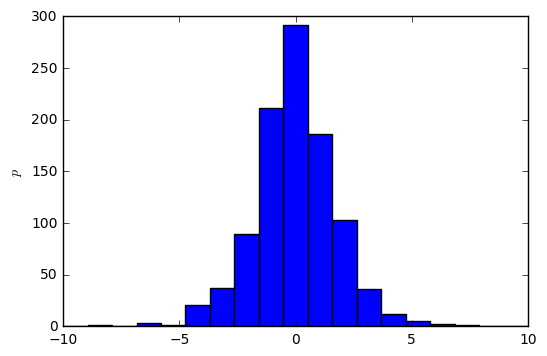

In [12]:
xs = cdf_inv(hs)
bins = np.linspace(-10, 10, 20)
_ = plt.hist(xs, bins=bins)
plt.ylabel('$p$')

compare to numpy functions

In [13]:
xs_from_np = np.random.logistic(scale=1, size=1000)

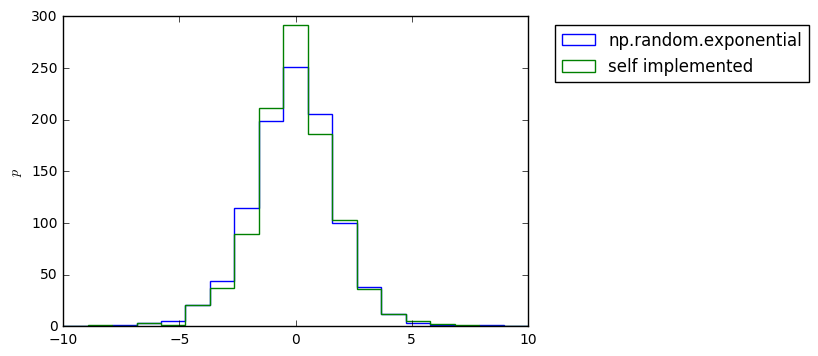

In [14]:
ax = plt.axes()

bins = np.linspace(-10, 10, 20)
ax.hist(xs_from_np, bins=bins, histtype='step', label='np.random.exponential')
ax.hist(xs, bins=bins, histtype='step', label='self implemented')

ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
ax.set_ylabel('$p$')

Awesome! They match well.

Put $h(x)$ and $h^{-1}(x)$ in one picture. Sampling from a uniform distribution is represented on the y axis, then we apply the inverse function, and map the sampled data to the x axis, which is distributed following the exact distribution we want. 

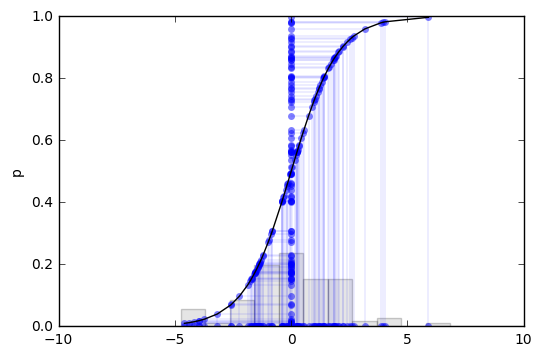

In [15]:
ax = plt.axes()

hs = np.sort(np.random.uniform(0, 1, 100))
for i in hs:
    ax.plot([0, cdf_inv(i), cdf_inv(i)], [i, i, 0], 'o-',
            color='blue', lw=0.2, markersize=5, alpha=0.5, markeredgecolor='none')
ax.plot(cdf_inv(hs), hs, color='black')
ax.set_ylabel('p')
_ = ax.hist(cdf_inv(hs), bins=bins, alpha=0.2, color='gray', normed=True)